# show image

In [2]:
from PIL import Image

# Create a new 8x8 grayscale image
image = Image.new("L", (8, 8))

# Define pixel values (0 for black, 255 for white)
pixels = [
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255,
    0,0,0,0,255,255,255,255
]

# Put pixel values into the image
image.putdata(pixels)

# Display the image
image.show()


# Using build-in functions

In [8]:
import numpy as np
from scipy.signal import convolve2d

# Input matrix
input_matrix = np.array([
    [3,0,1,2,7,4],
    [1,5,8,9,3,1],
    [2,7,2,5,1,3],
    [0,1,3,1,7,8],
    [4,2,1,6,2,8],
    [2,4,5,2,3,9]
])

# Filter kernel
filter_kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

# Perform convolution
result = convolve2d(input_matrix, filter_kernel, mode='valid')

# Display the result
print(result)

[[  7  11  -2  -4]
 [-10 -17  -9   3]
 [ -4  -5   1   7]
 [  7   6  -1  -2]]


# Conv function

In [32]:
import numpy as np

# Input matrix
input_matrix = np.array([
    [3,0,1,2,7,4],
    [1,5,8,9,3,1],
    [2,7,2,5,1,3],
    [0,1,3,1,7,8],
    [4,2,1,6,2,8],
    [2,4,5,2,3,9]
])

# Filter kernel
filter_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

def conv(input_matrix, filter_kernel):

    input_rows, input_cols = input_matrix.shape
    kernel_rows, kernel_cols = filter_kernel.shape


    result_rows = input_rows - kernel_rows + 1
    result_cols = input_cols - kernel_cols + 1
    result = np.zeros((result_rows, result_cols))


    for i in range(result_rows):
        for j in range(result_cols):
            result[i, j] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel)



    return result

conv(input_matrix, filter_kernel)

array([[ -5.,  -4.,   0.,   8.],
       [-10.,  -2.,   2.,   3.],
       [  0.,  -2.,  -4.,  -7.],
       [ -3.,  -2.,  -3., -16.]])

# Padding

In [34]:
import numpy as np

input_matrix = np.array([   
    [2,3,7,4,6,2,9],
    [6,6,9,8,7,4,3],
    [3,4,8,3,8,9,7],
    [7,8,3,6,6,3,4],
    [4,2,1,8,1,4,6],
    [3,2,4,1,9,8,3],
    [0,1,3,9,2,1,4]
    
])


filter_kernel = np.array([
    [3, 4, 4],
    [1, 0, 2],
    [-1, 0, 3]
])



padding_size = filter_kernel.shape[0] // 2
print(f"Padding size: \n{padding_size}")

padded_input = np.pad(input_matrix, padding_size, mode='constant')

print(f"Padded input = \n{padded_input}")


padded_rows, padded_cols = padded_input.shape

result = np.zeros_like(input_matrix)


for i in range(padding_size, padded_rows - padding_size):
    for j in range(padding_size, padded_cols - padding_size):
        result[i-padding_size, j-padding_size] = np.sum(padded_input[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1] * filter_kernel)

# Display the result
print(f"\nResult input = {result}")

Padding size: 
1
Padded input = 
[[0 0 0 0 0 0 0 0 0]
 [0 2 3 7 4 6 2 9 0]
 [0 6 6 9 8 7 4 3 0]
 [0 3 4 8 3 8 9 7 0]
 [0 7 8 3 6 6 3 4 0]
 [0 4 2 1 8 1 4 6 0]
 [0 3 2 4 1 9 8 3 0]
 [0 0 1 3 9 2 1 4 0]
 [0 0 0 0 0 0 0 0 0]]

Result input = [[ 24  37  29  31  12  26  -2]
 [ 44  91  80 100  84  88  37]
 [ 80  99 106 126  92  77  30]
 [ 50  69  98  85  93 119  54]
 [ 70  80  79  83  93  59  21]
 [ 31  44  72  64  55  68  43]
 [ 22  39  45  59  82  81  37]]


# Conv function

In [20]:
# Input matrix
input_matrix = np.array([
    [2,3,7,4,6,2,9],
    [6,6,9,8,7,4,3],
    [3,4,8,3,8,9,7],
    [7,8,3,6,6,3,4],
    [4,2,1,8,1,4,6],
    [3,2,4,1,9,8,3],
    [0,1,3,9,2,1,4]
    
])

# Filter kernel
filter_kernel = np.array([
    [3, 4, 4],
    [1, 0, 2],
    [-1, 0, 3]
])



input_rows, input_cols = input_matrix.shape
kernel_rows, kernel_cols = filter_kernel.shape

# Result matrix
result_rows = input_rows - kernel_rows + 1
result_cols = input_cols - kernel_cols + 1
result = np.zeros((result_rows, result_cols))

# Perform convolution
for i in range(result_rows):
    for j in range(result_cols):
        result[i, j] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel)

# Display the result
print(result)

[[ 91.  80. 100.  84.  88.]
 [ 99. 106. 126.  92.  77.]
 [ 69.  98.  85.  93. 119.]
 [ 80.  79.  83.  93.  59.]
 [ 44.  72.  64.  55.  68.]]


In [21]:
import numpy as np

# Input matrix
input_matrix = np.array([
    [2,3,7,4,6,2,9],
    [6,6,9,8,7,4,3],
    [3,4,8,3,8,9,7],
    [7,8,3,6,6,3,4],
    [4,2,1,8,1,4,6],
    [3,2,4,1,9,8,3],
    [0,1,3,9,2,1,4]
])

# Filter kernel
filter_kernel = np.array([
    [3, 4, 4],
    [1, 0, 2],
    [-1, 0, 3]
])

input_rows, input_cols = input_matrix.shape
kernel_rows, kernel_cols = filter_kernel.shape

# Define stride
stride = 2

# Calculate the size of the result matrix
result_rows = (input_rows - kernel_rows) // stride + 1
result_cols = (input_cols - kernel_cols) // stride + 1

# Result matrix
result = np.zeros((result_rows, result_cols))

# Perform convolution
for i in range(0, input_rows - kernel_rows + 1, stride):
    for j in range(0, input_cols - kernel_cols + 1, stride):
        result[i // stride, j // stride] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel)

# Display the result
print(result)


[[ 91. 100.  88.]
 [ 69.  85. 119.]
 [ 44.  64.  68.]]


In [23]:
import numpy as np

# Input matrix
input_matrix = np.array([
    [2,3,7,4,6,2],
    [6,6,9,8,7,4],
    [3,4,8,3,8,9],
    [7,8,3,6,6,3],
    [4,2,1,8,1,4],
    [3,2,4,1,9,8],
])

# Filter kernel
filter_kernel = np.array([
    [3, 4, 5],
    [1, 0, 2],
    [-1, 9, 7]
    

])

input_rows, input_cols = input_matrix.shape
kernel_rows, kernel_cols = filter_kernel.shape

# Define stride
stride = 1

# Calculate the size of the result matrix
result_rows = (input_rows - kernel_rows) // stride + 1
result_cols = (input_cols - kernel_cols) // stride + 1

# Result matrix
result = np.zeros((result_rows, result_cols))

# Perform convolution
for i in range(0, input_rows - kernel_rows + 1, stride):
    for j in range(0, input_cols - kernel_cols + 1, stride):
        result[i // stride, j // stride] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel)

# Display the result
print(result)


[[166. 168. 165. 194.]
 [192. 165. 211. 162.]
 [ 99. 142. 169. 127.]
 [117. 125. 134. 209.]]


In [26]:
import numpy as np

# Input matrix
input_matrix = np.array([
    [2,3,7,4,6,2],
    [6,6,9,8,7,4],
    [3,4,8,3,8,9],
    [7,8,3,6,6,3],
    [4,2,1,8,1,4],
    [3,2,4,1,9,8],
])

# Filter kernel
filter_kernel = np.array([
    [3, 4, 5],
    [1, 0, 2],
    [-1, 9, 7]
])

# Rotate the filter kernel by 90 degrees
filter_kernel_rotated = np.rot90(filter_kernel, k=1)

print(f"Filter rotated:\n {filter_kernel_rotated} \n")

input_rows, input_cols = input_matrix.shape
kernel_rows, kernel_cols = filter_kernel_rotated.shape

# Define stride
stride = 1

# Calculate the size of the result matrix
result_rows = (input_rows - kernel_rows) // stride + 1
result_cols = (input_cols - kernel_cols) // stride + 1

# Result matrix
result = np.zeros((result_rows, result_cols))

# Perform convolution
for i in range(0, input_rows - kernel_rows + 1, stride):
    for j in range(0, input_cols - kernel_cols + 1, stride):
        result[i // stride, j // stride] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel_rotated)

# Display the result
print(result)


Filter rotated:
 [[ 5  2  7]
 [ 4  0  9]
 [ 3  1 -1]] 

[[175. 170. 203. 122.]
 [215. 168. 223. 196.]
 [147. 142. 178. 166.]
 [104. 177.  86. 135.]]


# Conv for real image

## functions

In [1]:
import numpy as np
from PIL import Image

def conv(input_matrix, filter_kernel):
    input_rows, input_cols = input_matrix.shape
    kernel_rows, kernel_cols = filter_kernel.shape

    # Result matrix
    result_rows = input_rows - kernel_rows + 1
    result_cols = input_cols - kernel_cols + 1
    result = np.zeros((result_rows, result_cols))

    # Perform convolution
    for i in range(result_rows):
        for j in range(result_cols):
            result[i, j] = np.sum(input_matrix[i:i+kernel_rows, j:j+kernel_cols] * filter_kernel)

    # Display the result
    return result

# reading image and applying filter

In [2]:
image = Image.open('img1.jpeg')
image.show()

image = image.convert('L')

image_matrix = np.array(image.getdata()).reshape((image.size[1], image.size[0]))
print(f"Image matrix \n {image_matrix}")


ready_image = Image.fromarray(image_matrix)
ready_image.show()


input_matrix = image_matrix

# Filter kernel
filter_kernel_vert = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

filter_kernel_hori = np.array([
    [1, 1, 1],
    [0, 0,0 ],
    [-1,-1,-1]
])


vertical_conv = conv(input_matrix, filter_kernel_vert)
horizontal_conv = conv(input_matrix, filter_kernel_hori)


resutl_image_verti = Image.fromarray(vertical_conv)
resutl_image_hori = Image.fromarray(horizontal_conv)



Image matrix 
 [[ 52  54  58 ... 106 104 102]
 [ 52  55  58 ... 107 105 103]
 [ 53  56  59 ... 107 105 103]
 ...
 [  9   8   8 ...  66  68  68]
 [  9   8   8 ...  66  67  68]
 [  8   8   7 ...  66  67  68]]


In [9]:
import matplotlib.pyplot as plt

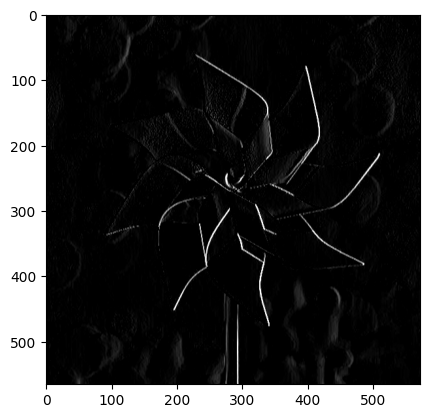

In [10]:
plt.imshow(resutl_image_verti)

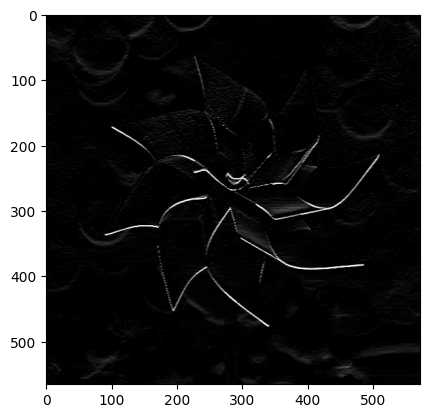

In [11]:
plt.imshow(resutl_image_hori)
